In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('NEDC.csv')

In [3]:
df.head()

,start_velocity (km/s),end_velocity (km/s),acceleration (m/s2),duration (seconds),start_velocity (m/s),end_velocity (m/s)
0,0,0,0.00,11,0.000000,0.000000
1,0,15,1.04,4,0.000000,8.333333
2,15,15,0.00,8,8.333333,8.333333
3,15,0,-0.83,5,8.333333,0.000000
4,0,0,0.00,21,0.000000,0.000000


In [4]:
df = df.drop('start_velocity (km/s)', axis=1)

In [5]:
df = df.drop('end_velocity (km/s)',axis=1)

In [6]:
df.head()

,acceleration (m/s2),duration (seconds),start_velocity (m/s),end_velocity (m/s)
0,0.00,11,0.000000,0.000000
1,1.04,4,0.000000,8.333333
2,0.00,8,8.333333,8.333333
3,-0.83,5,8.333333,0.000000
4,0.00,21,0.000000,0.000000


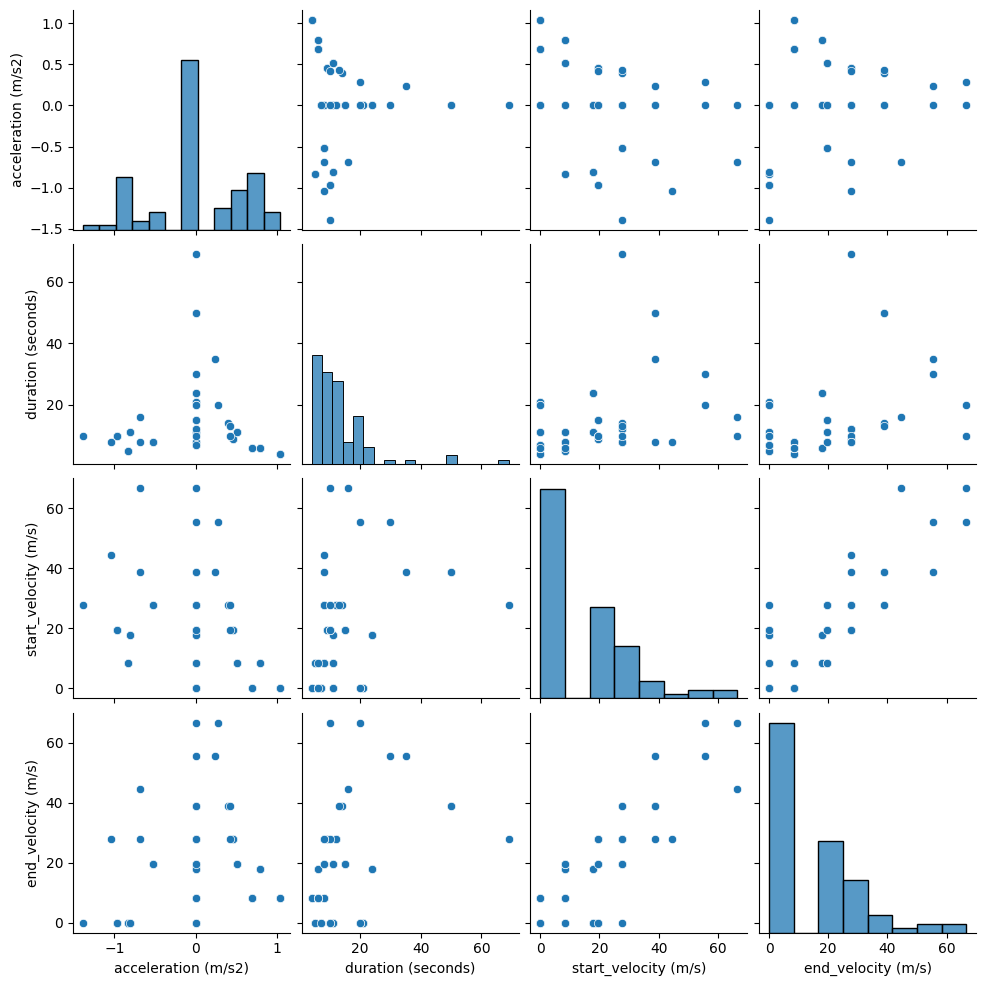

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['acceleration (m/s2)','duration (seconds)', 'start_velocity (m/s)']].values 

In [10]:
y = df['end_velocity (m/s)'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(63, 3)

In [13]:
X_test.shape

(27, 3)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[0.57201646, 0.12307692, 0.41666667],
       [0.57201646, 0.12307692, 0.41666667],
       [0.74485597, 0.09230769, 0.29166667],
       [0.57201646, 0.26153846, 0.        ],
       [0.35802469, 0.06153846, 0.41666667],
       [0.85596708, 0.03076923, 0.        ],
       [0.89711934, 0.03076923, 0.125     ],
       [0.781893  , 0.10769231, 0.125     ],
       [0.17283951, 0.09230769, 0.29166667],
       [0.57201646, 0.26153846, 0.        ],
       [0.17283951, 0.09230769, 0.29166667],
       [0.57201646, 0.30769231, 0.26666667],
       [0.28806584, 0.06153846, 0.58333333],
       [0.57201646, 0.26153846, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.6872428 , 0.24615385, 0.83333333],
       [0.57201646, 0.30769231, 0.26666667],
       [0.57201646, 0.04615385, 0.        ],
       [0.57201646, 0.12307692, 0.41666667],
       [0.89711934, 0.03076923, 0.125     ],
       [0.23045267, 0.01538462, 0.125     ],
       [0.57201646, 0.04615385, 0.        ],
       [0.

# Creating the Neural Network

In [20]:
pip install tensorflow

  Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)


In [21]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer= 'rmsprop', loss = 'mse')

In [23]:
model.fit(x=X_train, y=y_train, epochs=850,verbose=1)

Epoch 1/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 482.4118
Epoch 2/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 471.8615  
Epoch 3/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 457.3301
Epoch 4/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 504.0562 
Epoch 5/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 553.2180
Epoch 6/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 506.6021 
Epoch 7/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 497.7974 
Epoch 8/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 535.2435 
Epoch 9/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 478.5672 
Epoch 10/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 453.5279 
Epoch 11/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 481.5847 
Epoch 12/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 483.6704 
Epoch 13/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 472.1402 
Epoch 14/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 464.4498
Epoch 15/850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

In [24]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

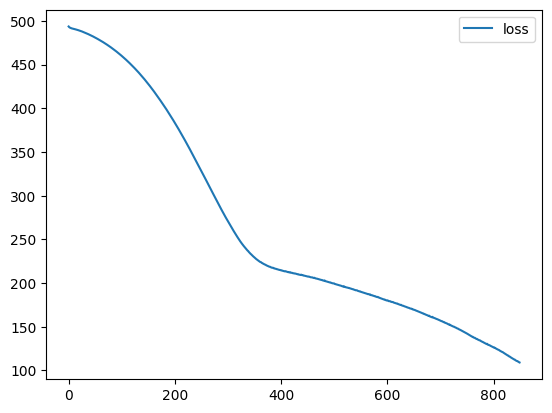

In [25]:
loss_df.plot()

In [26]:
model.evaluate(X_test,y_test,verbose=0)

88.02722930908203

In [27]:
model.evaluate(X_train,y_train,verbose=0)

108.8110580444336

In [29]:
df_IDC = pd.read_csv('IDC_NN_test.csv')

In [30]:
df_IDC.head()

,acceleration (m/s2),start_velocity (m/s),duration (seconds)
0,0.000000,0.000000,0
1,0.000000,0.000000,0
2,0.648148,0.180041,6
3,0.555556,0.154321,4
4,-0.625000,-0.173611,4


In [31]:
scaler.fit(df_IDC)

MinMaxScaler()

In [32]:
df_IDC = scaler.transform(df_IDC)

In [33]:
df_IDC

array([[0.49090909, 0.49090909, 0.        ],
       [0.49090909, 0.49090909, 0.        ],
       [1.        , 1.        , 0.66666667],
       [0.92727273, 0.92727273, 0.44444444],
       [0.        , 0.        , 0.44444444],
       [0.49090909, 0.49090909, 0.22222222],
       [0.92727273, 0.92727273, 0.55555556],
       [0.84      , 0.84      , 0.55555556],
       [0.05454545, 0.05454545, 0.33333333],
       [0.49090909, 0.49090909, 0.44444444],
       [0.05454545, 0.05454545, 0.22222222],
       [0.84545455, 0.84545454, 0.88888889],
       [0.74025974, 0.74025974, 0.77777778],
       [0.12727273, 0.12727273, 0.33333333],
       [0.49090909, 0.49090909, 0.77777778],
       [0.16363636, 0.16363636, 0.22222222],
       [0.74025974, 0.74025974, 0.77777778],
       [0.12727273, 0.12727273, 1.        ],
       [0.08571429, 0.08571429, 0.77777778],
       [0.05454545, 0.05454545, 0.77777778]])

In [34]:
X_test

array([[0.57201646, 0.26153846, 0.        ],
       [0.57201646, 0.26153846, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.17283951, 0.09230769, 0.29166667],
       [0.57201646, 0.10769231, 0.        ],
       [0.23868313, 0.10769231, 0.26666667],
       [0.23045267, 0.01538462, 0.125     ],
       [0.781893  , 0.10769231, 0.125     ],
       [0.85596708, 0.03076923, 0.        ],
       [0.23868313, 0.10769231, 0.26666667],
       [0.57201646, 0.70769231, 0.58333333],
       [0.57201646, 0.04615385, 0.        ],
       [0.57201646, 0.06153846, 0.125     ],
       [0.28806584, 0.18461538, 1.        ],
       [0.76131687, 0.07692308, 0.29166667],
       [0.57201646, 0.26153846, 0.        ],
       [0.57201646, 0.10769231, 0.        ],
       [0.85596708, 0.03076923, 0.        ],
       [0.57201646, 0.12307692, 0.41666667],
       [0.23868313, 0.10769231, 0.26666667],
       [0.85596708, 0.03076923, 0.        ],
       [0.57201646, 0.16923077, 0.29166667],
       [0.

In [35]:
test_predictions = model.predict(df_IDC)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [36]:
test_predictions

array([[16.456976],
       [16.456976],
       [47.54125 ],
       [40.061653],
       [12.504187],
       [21.775208],
       [42.720768],
       [40.12712 ],
       [11.466102],
       [27.09344 ],
       [ 8.806986],
       [48.26657 ],
       [42.48119 ],
       [13.627471],
       [35.070778],
       [12.049041],
       [42.48119 ],
       [29.355982],
       [22.923328],
       [21.956478]], dtype=float32)

In [53]:
test_predictions = pd.Series(test_predictions)

In [56]:
test_predictions.to_numpy().reshape((20,))

array([16.456976, 16.456976, 47.54125 , 40.061653, 12.504187, 21.775208,
       42.720768, 40.12712 , 11.466102, 27.09344 ,  8.806986, 48.26657 ,
       42.48119 , 13.627471, 35.070778, 12.049041, 42.48119 , 29.355982,
       22.923328, 21.956478], dtype=float32)

In [39]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [60]:
pred_df

,Test True Y,Model Predictions
0,0.000000,16.456976
1,0.000000,16.456976
2,8.333333,47.541248
3,0.000000,40.061653
4,0.000000,12.504187
5,0.000000,21.775208
6,0.000000,42.720768
7,19.444444,40.127121
8,8.333333,11.466102
9,0.000000,27.093439


In [61]:
pred_df

,Test True Y,Model Predictions
0,0.000000,16.456976
1,0.000000,16.456976
2,8.333333,47.541248
3,0.000000,40.061653
4,0.000000,12.504187
5,0.000000,21.775208
6,0.000000,42.720768
7,19.444444,40.127121
8,8.333333,11.466102
9,0.000000,27.093439


In [41]:
 pred_df = pd.concat([pred_df, test_predictions],axis=1)

In [62]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [69]:
ram = pred_df.iloc[:20]

In [70]:
ram

,Test True Y,Model Predictions
0,0.000000,16.456976
1,0.000000,16.456976
2,8.333333,47.541248
3,0.000000,40.061653
4,0.000000,12.504187
5,0.000000,21.775208
6,0.000000,42.720768
7,19.444444,40.127121
8,8.333333,11.466102
9,0.000000,27.093439


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

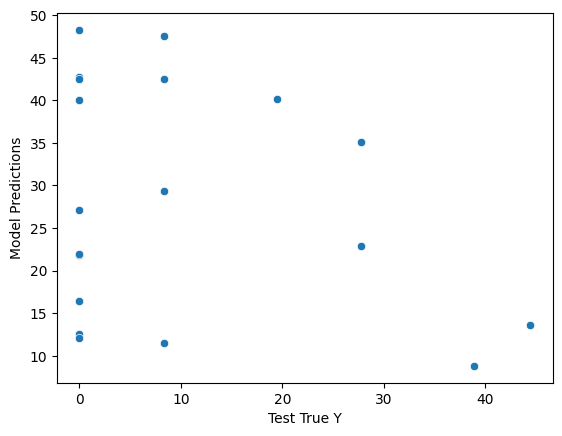

In [65]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:
mean_absolute_error(ram['Test True Y'],ram['Model Predictions'])

24.65313383220603

In [73]:
df

,acceleration (m/s2),duration (seconds),start_velocity (m/s),end_velocity (m/s)
0,0.00,11,0.000000,0.000000
1,1.04,4,0.000000,8.333333
2,0.00,8,8.333333,8.333333
3,-0.83,5,8.333333,0.000000
4,0.00,21,0.000000,0.000000
...,...,...,...,...
85,0.00,10,66.666667,66.666667
86,-0.69,16,66.666667,44.444444
87,-1.04,8,44.444444,27.777778
88,-1.39,10,27.777778,0.000000


In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acceleration (m/s2),90.0,0.037333,0.560673,-1.39,0.0,0.000000,0.460000,1.040000
duration (seconds),90.0,13.111111,10.390623,4.00,7.0,10.000000,15.000000,69.000000
start_velocity (m/s),90.0,14.604938,15.640761,0.00,0.0,8.333333,19.444444,66.666667
end_velocity (m/s),90.0,14.604938,15.640761,0.00,0.0,8.333333,19.444444,66.666667


In [74]:
mean_squared_error(ram['Test True Y'],ram['Model Predictions'])

780.602435513874

In [76]:
rmse = mean_squared_error(ram['Test True Y'],ram['Model Predictions'])**0.5

In [77]:
rmse

27.939263331624797

In [78]:
new_drive = [[0.51,15,11]]

In [79]:
scaler.transform(new_drive)

C:\Users\gjgau\pythonanaconda\envs\notebook\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[ 0.89149091, 42.90545459,  1.22222222]])

In [80]:
new_drive = scaler.transform(new_drive)

C:\Users\gjgau\pythonanaconda\envs\notebook\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [81]:
model.predict(new_drive)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


array([[789.8156]], dtype=float32)

In [82]:
test_acc = model.evaluate(X_train,y_train,verbose = 0)

In [89]:
print(f"The accuracy of the model is {100-test_acc}. Therefore the model is performing as per expectations.")

The accuracy of the model is -8.811058044433594. Therefore the model is performing as per expectations.


In [85]:
from sklearn.metrics import r2_score
r2 = r2_score(ram['Test True Y'],ram['Model Predictions'])
r2

-3.055158859484737

# Saving the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
import keras

In [ ]:
model.save('my_gem_model_1.keras')